In [1]:
from sklearn.datasets import make_blobs

# K-means clustering using scikit-learn

We start by creating 150 randomly generated points that are roughly grouped into three regions.

In [2]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

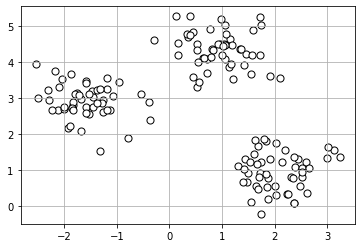

In [4]:
plt.scatter(X[:, 0], X[:, 1], c="white", marker="o", edgecolor="black", s=50)
plt.grid()
plt.show()

In [5]:
from sklearn.cluster import KMeans

# K-Means requires setting the number of clusters a-priori.
km = KMeans(
    n_clusters=3,
    init="random",  # replace with k-means++
    n_init=10,  # Run 10 times with different starting points.
    max_iter=300,
    tol=1e-4,
    random_state=0,
)
y_km = km.fit_predict(X)

In [6]:
import numpy as np

# Each points will be assigned to a numerical value, which refers to the cluster points.
np.unique(y_km)

array([0, 1, 2], dtype=int32)

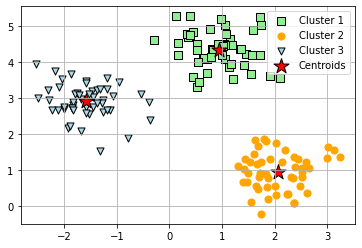

In [7]:
def plot_cluster(cluster, X):
    y = cluster.fit_predict(X)
    colors = ["lightgreen", "orange", "lightblue"]
    edgecolors = ["black", "orange", "black"]
    markers = list("sov")
    labels = [f"Cluster {i+1}" for i, _ in enumerate(np.unique(y))]

    for color, edgecolor, marker, label, y_km in zip(
        colors, edgecolors, markers, labels, np.unique(y)
    ):
        plt.scatter(
            X[y == y_km, 0],
            X[y == y_km, 1],
            s=50,
            c=color,
            marker=marker,
            edgecolor=edgecolor,
            label=label,
        )
    plt.scatter(
        km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250,
        marker="*",
        c="red",
        edgecolor="black",
        label="Centroids",
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()


plot_cluster(km, X)

## K-Means++

A smarter way of placing initial clusters centroids instead of random.

## Elbow method

Finding optimal number of clusters

In [8]:
print("Distortion: {:.2f}".format(km.inertia_))

Distortion: 72.48


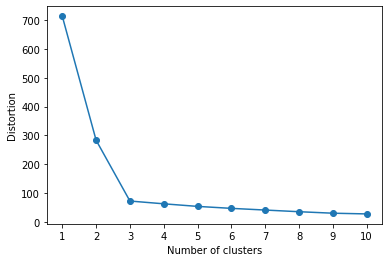

In [9]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.xticks(range(1, 11))
plt.ylabel("Distortion")
plt.show()

As `k` (number of clusters) increases, the distortion will decrease. The elbow is located at `k=3`.

## Silhoutte Analysis

Measure how tightly grouped the samples in the clusters are.

In [10]:
km = KMeans(
    n_clusters=3, init="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=0
)
y_km = km.fit_predict(X)

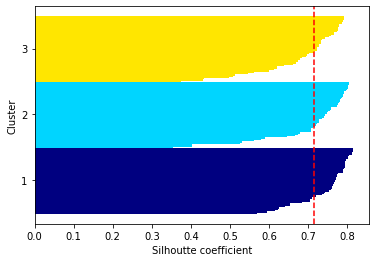

In [11]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric="euclidean")
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()

    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor="none",
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2.0)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhoutte coefficient")
plt.show()

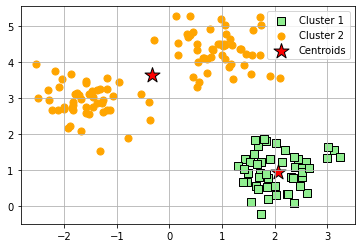

In [12]:
# K-Means requires setting the number of clusters a-priori.
km = KMeans(
    n_clusters=2,
    init="random",  # replace with k-means++
    n_init=10,  # Run 10 times with different starting points.
    max_iter=300,
    tol=1e-4,
    random_state=0,
)
y_km = km.fit_predict(X)
plot_cluster(km, X)

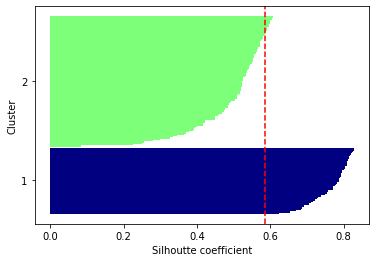

In [13]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric="euclidean")
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()

    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor="none",
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2.0)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhoutte coefficient")
plt.show()

# Organizing clusters as hierachical tree

Hierarchical clustering does not require specifying the number of clusters upfront.

Two algorithms
- single linkage - computes distances between the most similar members for each pair of clusters and merge the clusters for which the distance between the most similar members is the smallest
- complete linkage - compare the most disimilar members

In [15]:
import numpy as np
import pandas as pd

np.random.seed(123)

variables = list("xyz")
labels = [f"ID_{i}" for i in range(5)]
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,x,y,z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [18]:
from scipy.spatial.distance import pdist, squareform

# help(pdist)
row_dist = pd.DataFrame(
    squareform(pdist(df, metric="euclidean")), columns=labels, index=labels
)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

row_clusters = linkage(df.values, method="complete", metric="euclidean")
pd.DataFrame(
    row_clusters,
    columns=["row label 1", "row label 2", "distance", "no. of items in clust."],
    index=[f"cluster {i+1}" for i in range(row_clusters.shape[0])],
)

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


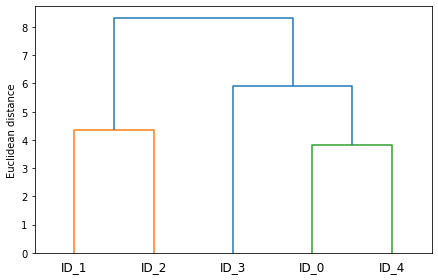

In [24]:
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel("Euclidean distance")
plt.show()

## Attaching denrograms to heat map

<ipython-input-27-019796477d18>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([""] + list(df_rowclust.columns))
<ipython-input-27-019796477d18>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([""] + list(df_rowclust.index))


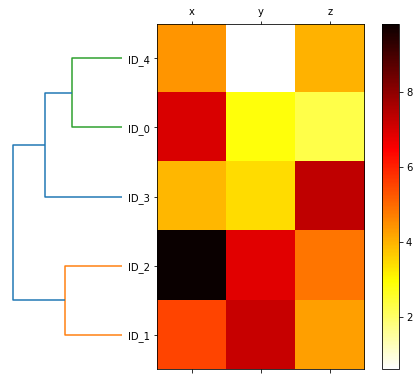

In [27]:
fig = plt.figure(figsize=(8, 8), facecolor="white")
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(
    row_clusters, orientation="left"
)  # Rotate 90 degrees counter-clockwise.

# Reorder the data according to the clustering labels.
df_rowclust = df.iloc[row_dendr["leaves"][::-1]]

# Plot heat map.
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation="nearest", cmap="hot_r")

# Removing axis ticks and hiding axis spine.
axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)

fig.colorbar(cax)
axm.set_xticklabels([""] + list(df_rowclust.columns))
axm.set_yticklabels([""] + list(df_rowclust.index))
plt.show()

## Applying agglomerative clustering via sickit-learn

In [30]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
labels = ac.fit_predict(X)
print(
    "Cluster labels: ", labels
)  # cluster 1: ID_0 and ID_4, cluster 0: ID_1 and ID_2, cluster 2: ID_3

Cluster labels:  [1 0 0 2 1]


## Locating regions of high density via DBSCAN

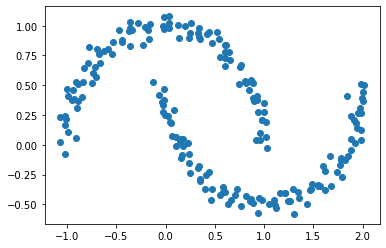

In [31]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### Applying k-means and agglomerative clustering

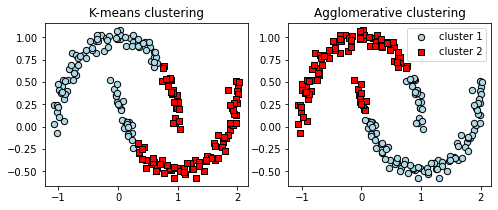

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    c="lightblue",
    edgecolor="black",
    marker="o",
    s=40,
    label="cluster 1",
)
ax1.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    c="red",
    edgecolor="black",
    marker="s",
    s=40,
    label="cluster 2",
)
ax1.set_title("K-means clustering")

ac = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="complete")
y_ac = ac.fit_predict(X)


ax2.scatter(
    X[y_ac == 0, 0],
    X[y_ac == 0, 1],
    c="lightblue",
    edgecolor="black",
    marker="o",
    s=40,
    label="cluster 1",
)
ax2.scatter(
    X[y_ac == 1, 0],
    X[y_ac == 1, 1],
    c="red",
    edgecolor="black",
    marker="s",
    s=40,
    label="cluster 2",
)
ax2.set_title("Agglomerative clustering")
plt.legend()
plt.show()

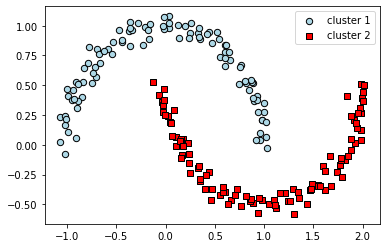

In [36]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
y_db = db.fit_predict(X)

plt.scatter(
    X[y_db == 0, 0],
    X[y_db == 0, 1],
    c="lightblue",
    edgecolor="black",
    marker="o",
    s=40,
    label="cluster 1",
)
plt.scatter(
    X[y_db == 1, 0],
    X[y_db == 1, 1],
    c="red",
    edgecolor="black",
    marker="s",
    s=40,
    label="cluster 2",
)
plt.legend()
plt.show()